In [10]:
from __future__ import print_function            
import keras 
from keras.models import Sequential                
from keras.layers import Dense, Activation         
                                                  
from keras.optimizers import Adam                   

import pandas                                       
from sklearn.model_selection import train_test_split

In [11]:
dataset = pandas.read_csv("train.csv") 
dataset = dataset.as_matrix() 
X,y = dataset[:,1:], dataset[:,0] 

the shape of features is: (42000, 784)
the shape of labels is: (42000,)
the range of features is: 0 to 255
the range of labels is: 0 to 9
label 1 is 1
label 2 is 0
label 3 is 1
label 4 is 4
label 5 is 0


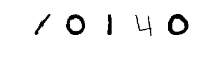

In [12]:
print ('the shape of features is:',X.shape)       
print ('the shape of labels is:',y.shape)       

import numpy as np
print ('the range of features is:',np.min(X),'to',np.max(X))
print ('the range of labels is:',np.min(y),'to',np.max(y))

import matplotlib.pyplot as plt
% matplotlib inline
for i in range(5):
    image = X[i]
    plt.subplot(1,10, i+1)
    image = image.reshape(28,28)
    print ('label', i+1, 'is',y[i])
    plt.imshow(image, cmap='Greys')
    plt.axis('off')

In [13]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.20) 

x_train = x_train/255.0                           
x_val = x_val/255.0                             

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_val = keras.utils.to_categorical(y_val, num_classes=10)

# 备注
这里我加了一个hidden layer并尝试过改变neurons，batch_size和learning_rate的参数值，最终使用的参数如下所示，同时我利用keras documentation找到了可选用的optimizers，都尝试了一下，发现Adam是输出准确率最高的，其输出结果如下：

In [14]:
# set parameters
batch_size = 128
epochs = 300
learning_rate = 0.001

# build the model
model = Sequential()                                         
model.add(Dense(256, activation='relu',input_dim=784))       
model.add(Dense(128, activation='relu'))                     
model.add(Dense(128, activation='relu'))                     # third hidden layer with 128 neurons
model.add(Dense(10, activation='softmax'))                   
model.summary()                                              


my_optimizer = keras.optimizers.Adam(lr=learning_rate)    
model.compile(optimizer=my_optimizer,                        # using Adam with our set lr as optimizer
              loss='categorical_crossentropy',               
              metrics=['accuracy'])                          

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 251,658
Trainable params: 251,658
Non-trainable params: 0
_________________________________________________________________


In [15]:
best_weights_filepath = './best_weights.hdf5' ##define the filename to store
                                            ##the best performance and weights
earlyStopping = keras.callbacks.EarlyStopping(monitor='val_acc',
                                              patience = 5) 
#Stop training early if val_acc doesn't improve for 5 epochs

SaveBestWeights = keras.callbacks.ModelCheckpoint(best_weights_filepath,
                                                  monitor='val_acc',
                                                  save_best_only=True)
# store the historically best performing weights in best_weights_filepath
#, where performance is given by accuracy on the validation set.


model_history = model.fit(x_train, y_train,                   # training data 
                    batch_size=batch_size,                   # batch size 256
                    epochs=epochs,                           # 300 epochs 
                    verbose= 2,                              # verbose level
                    validation_data = (x_val, y_val),  #Use the previously defined x_test as a validation set. 
                    callbacks = [earlyStopping, SaveBestWeights]
                         )     
model.load_weights(best_weights_filepath) ##Set the best performing weights to the model

Train on 33600 samples, validate on 8400 samples
Epoch 1/300
 - 3s - loss: 0.3573 - acc: 0.8967 - val_loss: 0.1730 - val_acc: 0.9500
Epoch 2/300
 - 2s - loss: 0.1271 - acc: 0.9617 - val_loss: 0.1147 - val_acc: 0.9638
Epoch 3/300
 - 2s - loss: 0.0840 - acc: 0.9740 - val_loss: 0.1292 - val_acc: 0.9619
Epoch 4/300
 - 2s - loss: 0.0601 - acc: 0.9812 - val_loss: 0.1103 - val_acc: 0.9679
Epoch 5/300
 - 2s - loss: 0.0413 - acc: 0.9875 - val_loss: 0.0961 - val_acc: 0.9733
Epoch 6/300
 - 2s - loss: 0.0311 - acc: 0.9902 - val_loss: 0.1112 - val_acc: 0.9706
Epoch 7/300
 - 2s - loss: 0.0253 - acc: 0.9921 - val_loss: 0.0918 - val_acc: 0.9756
Epoch 8/300
 - 2s - loss: 0.0164 - acc: 0.9950 - val_loss: 0.1048 - val_acc: 0.9746
Epoch 9/300
 - 2s - loss: 0.0154 - acc: 0.9951 - val_loss: 0.1086 - val_acc: 0.9735
Epoch 10/300
 - 2s - loss: 0.0157 - acc: 0.9945 - val_loss: 0.1301 - val_acc: 0.9695
Epoch 11/300
 - 2s - loss: 0.0191 - acc: 0.9934 - val_loss: 0.1082 - val_acc: 0.9727
Epoch 12/300
 - 2s - loss

In [16]:
testset = pandas.read_csv("test.csv")             # Read data
testset = testset.as_matrix()                     # Convert to ndarray
testset = testset/255.0                             # normalize testing data
predictions = model.predict_classes(testset)           # Predict

In [17]:
submission = pandas.DataFrame(data=predictions, index=np.arange(1,len(predictions)+1), columns=['Label']) # Create dataframe
submission.index.name = 'ImageId' # Set index name

csv_text = submission.to_csv() # Convert to text

# Write to file 'submission.csv'
with open("submission.csv",'w') as csv_file:
    csv_file.write(csv_text)